# Topic 1: Simple Text Processing - SOLUTIONS

Complete solutions to all text processing exercises.

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

# Try to import NLTK
try:
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    NLTK_AVAILABLE = True
except:
    NLTK_AVAILABLE = False

print(f"NLTK available: {NLTK_AVAILABLE}")

NLTK available: True


In [2]:
# Sample texts for testing
german_texts = [
    "Ich liebe Pizza und Pasta. Computer sind sehr nützlich heute.",
    "Die Sonne scheint hell und warm. Hunde sind treue Freunde.",
    "Berlin ist die Hauptstadt von Deutschland. Es regnet heute sehr stark."
]

## Solution 1: Enhanced Text Statistics

In [3]:
def enhanced_text_statistics(text):
    """Calculate comprehensive text statistics."""
    
    # Basic counts
    char_count = len(text)
    char_count_no_spaces = len(text.replace(' ', ''))
    words = text.split()
    word_count = len(words)
    sentences = [s.strip() for s in text.split('.') if s.strip()]
    sentence_count = len(sentences)
    
    # Advanced statistics
    unique_words = len(set(word.lower().strip('.,!?') for word in words))
    lexical_diversity = unique_words / word_count if word_count > 0 else 0
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
    
    return {
        'characters': char_count,
        'characters_no_spaces': char_count_no_spaces,
        'words': word_count,
        'unique_words': unique_words,
        'sentences': sentence_count,
        'lexical_diversity': round(lexical_diversity, 3),
        'avg_word_length': round(avg_word_length, 2),
        'avg_sentence_length': round(avg_sentence_length, 1)
    }

# Test with sample text
for i, text in enumerate(german_texts, 1):
    print(f"\nText {i}: {text}")
    stats = enhanced_text_statistics(text)
    for key, value in stats.items():
        print(f"  {key}: {value}")


Text 1: Ich liebe Pizza und Pasta. Computer sind sehr nützlich heute.
  characters: 61
  characters_no_spaces: 52
  words: 10
  unique_words: 10
  sentences: 2
  lexical_diversity: 1.0
  avg_word_length: 5.2
  avg_sentence_length: 5.0

Text 2: Die Sonne scheint hell und warm. Hunde sind treue Freunde.
  characters: 58
  characters_no_spaces: 49
  words: 10
  unique_words: 10
  sentences: 2
  lexical_diversity: 1.0
  avg_word_length: 4.9
  avg_sentence_length: 5.0

Text 3: Berlin ist die Hauptstadt von Deutschland. Es regnet heute sehr stark.
  characters: 70
  characters_no_spaces: 60
  words: 11
  unique_words: 11
  sentences: 2
  lexical_diversity: 1.0
  avg_word_length: 5.45
  avg_sentence_length: 5.5


## Solution 2: Word Frequency Analysis

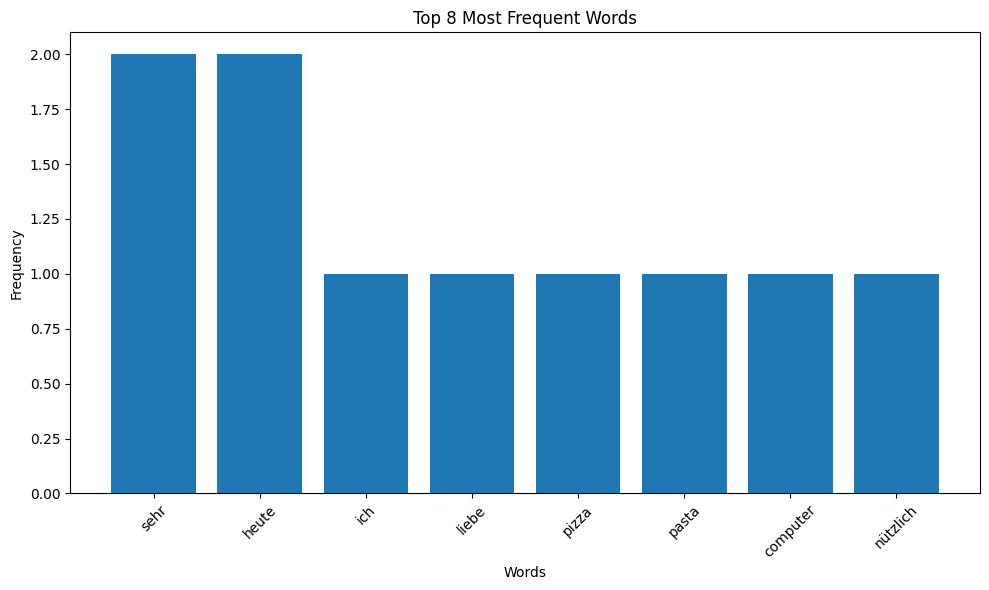


Most common words: [('sehr', 2), ('heute', 2), ('ich', 1), ('liebe', 1), ('pizza', 1), ('pasta', 1), ('computer', 1), ('nützlich', 1)]


In [4]:
def analyze_word_frequency(text, top_n=5):
    """Analyze word frequency with visualization."""
    
    # Simple preprocessing
    words = text.lower().replace('.', '').replace(',', '').replace('!', '').replace('?', '').split()
    
    # German stopwords (basic list)
    german_stopwords = {'und', 'der', 'die', 'das', 'ist', 'sind', 'in', 'von', 'zu', 'mit', 'auf', 'für', 'als', 'bei', 'nach', 'um', 'über', 'aus', 'an', 'vor'}
    
    # Filter stopwords
    content_words = [word for word in words if word not in german_stopwords and len(word) > 2]
    
    # Count frequencies
    word_freq = Counter(content_words)
    most_common = word_freq.most_common(top_n)
    
    # Create simple bar chart
    if most_common:
        words_list, counts_list = zip(*most_common)
        plt.figure(figsize=(10, 6))
        plt.bar(words_list, counts_list)
        plt.title(f'Top {top_n} Most Frequent Words')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return word_freq, most_common

# Test with combined text
combined_text = ' '.join(german_texts)
freq, common = analyze_word_frequency(combined_text, top_n=8)
print("\nMost common words:", common)

## Solution 3: Advanced Tokenization Comparison

In [5]:
def compare_tokenization_methods(text):
    """Compare different tokenization approaches."""
    
    results = {}
    
    # Method 1: Simple split
    simple_tokens = text.split()
    results['Simple Split'] = {
        'tokens': simple_tokens,
        'count': len(simple_tokens),
        'sample': simple_tokens[:5]
    }
    
    # Method 2: Regex-based tokenization
    import re
    regex_tokens = re.findall(r'\b\w+\b', text.lower())
    results['Regex'] = {
        'tokens': regex_tokens,
        'count': len(regex_tokens),
        'sample': regex_tokens[:5]
    }
    
    # Method 3: NLTK (if available)
    if NLTK_AVAILABLE:
        try:
            nltk_tokens = word_tokenize(text, language='german')
            results['NLTK'] = {
                'tokens': nltk_tokens,
                'count': len(nltk_tokens),
                'sample': nltk_tokens[:5]
            }
        except:
            pass
    
    return results

# Test comparison
test_text = "Hallo! Wie geht's? Das ist ein Test-Text mit Sonderzeichen."
comparison = compare_tokenization_methods(test_text)

print("Tokenization Comparison:")
print(f"Input: {test_text}\n")

for method, data in comparison.items():
    print(f"{method}:")
    print(f"  Count: {data['count']}")
    print(f"  Sample: {data['sample']}")
    print()

Tokenization Comparison:
Input: Hallo! Wie geht's? Das ist ein Test-Text mit Sonderzeichen.

Simple Split:
  Count: 9
  Sample: ['Hallo!', 'Wie', "geht's?", 'Das', 'ist']

Regex:
  Count: 11
  Sample: ['hallo', 'wie', 'geht', 's', 'das']



## Solution 4: Text Preprocessing Pipeline

In [6]:
class GermanTextProcessor:
    """Complete German text preprocessing pipeline."""
    
    def __init__(self):
        # Basic German stopwords
        self.stopwords = {
            'und', 'oder', 'aber', 'der', 'die', 'das', 'den', 'dem', 'des',
            'ein', 'eine', 'einer', 'einen', 'einem', 'ist', 'sind', 'war',
            'waren', 'hat', 'haben', 'wird', 'werden', 'in', 'von', 'zu',
            'mit', 'auf', 'für', 'als', 'bei', 'nach', 'um', 'über', 'aus',
            'an', 'vor', 'durch', 'gegen', 'ohne', 'unter', 'zwischen',
            'ich', 'du', 'er', 'sie', 'es', 'wir', 'ihr', 'sie', 'mich',
            'dich', 'sich', 'uns', 'euch', 'mir', 'dir', 'ihm', 'ihr', 'ihnen'
        }
    
    def clean_text(self, text):
        """Basic text cleaning."""
        import re
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation but keep German umlauts
        text = re.sub(r'[^a-zA-ZäöüÄÖÜß\s]', ' ', text)
        
        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def tokenize(self, text):
        """Tokenize text into words."""
        return text.split()
    
    def remove_stopwords(self, tokens):
        """Remove German stopwords."""
        return [token for token in tokens if token not in self.stopwords and len(token) > 2]
    
    def process(self, text):
        """Complete processing pipeline."""
        # Step by step processing
        cleaned = self.clean_text(text)
        tokens = self.tokenize(cleaned)
        filtered_tokens = self.remove_stopwords(tokens)
        
        return {
            'original': text,
            'cleaned': cleaned,
            'all_tokens': tokens,
            'content_tokens': filtered_tokens,
            'token_count': len(tokens),
            'content_token_count': len(filtered_tokens),
            'word_frequency': Counter(filtered_tokens)
        }

# Test the processor
processor = GermanTextProcessor()

for i, text in enumerate(german_texts, 1):
    print(f"\n=== Processing Text {i} ===")
    result = processor.process(text)
    
    print(f"Original: {result['original']}")
    print(f"Cleaned: {result['cleaned']}")
    print(f"All tokens ({result['token_count']}): {result['all_tokens']}")
    print(f"Content tokens ({result['content_token_count']}): {result['content_tokens']}")
    print(f"Most common: {result['word_frequency'].most_common(3)}")


=== Processing Text 1 ===
Original: Ich liebe Pizza und Pasta. Computer sind sehr nützlich heute.
Cleaned: ich liebe pizza und pasta computer sind sehr nützlich heute
All tokens (10): ['ich', 'liebe', 'pizza', 'und', 'pasta', 'computer', 'sind', 'sehr', 'nützlich', 'heute']
Content tokens (7): ['liebe', 'pizza', 'pasta', 'computer', 'sehr', 'nützlich', 'heute']
Most common: [('liebe', 1), ('pizza', 1), ('pasta', 1)]

=== Processing Text 2 ===
Original: Die Sonne scheint hell und warm. Hunde sind treue Freunde.
Cleaned: die sonne scheint hell und warm hunde sind treue freunde
All tokens (10): ['die', 'sonne', 'scheint', 'hell', 'und', 'warm', 'hunde', 'sind', 'treue', 'freunde']
Content tokens (7): ['sonne', 'scheint', 'hell', 'warm', 'hunde', 'treue', 'freunde']
Most common: [('sonne', 1), ('scheint', 1), ('hell', 1)]

=== Processing Text 3 ===
Original: Berlin ist die Hauptstadt von Deutschland. Es regnet heute sehr stark.
Cleaned: berlin ist die hauptstadt von deutschland es regnet 

## Solution 5: Multi-text Analysis

=== MULTI-TEXT ANALYSIS RESULTS ===
Total texts analyzed: 3
Total tokens: 31
Total content tokens: 21
Average tokens per text: 10.3

Most common words across all texts:
  sehr: 2
  heute: 2
  liebe: 1
  pizza: 1
  pasta: 1
  computer: 1
  nützlich: 1
  sonne: 1
  scheint: 1
  hell: 1


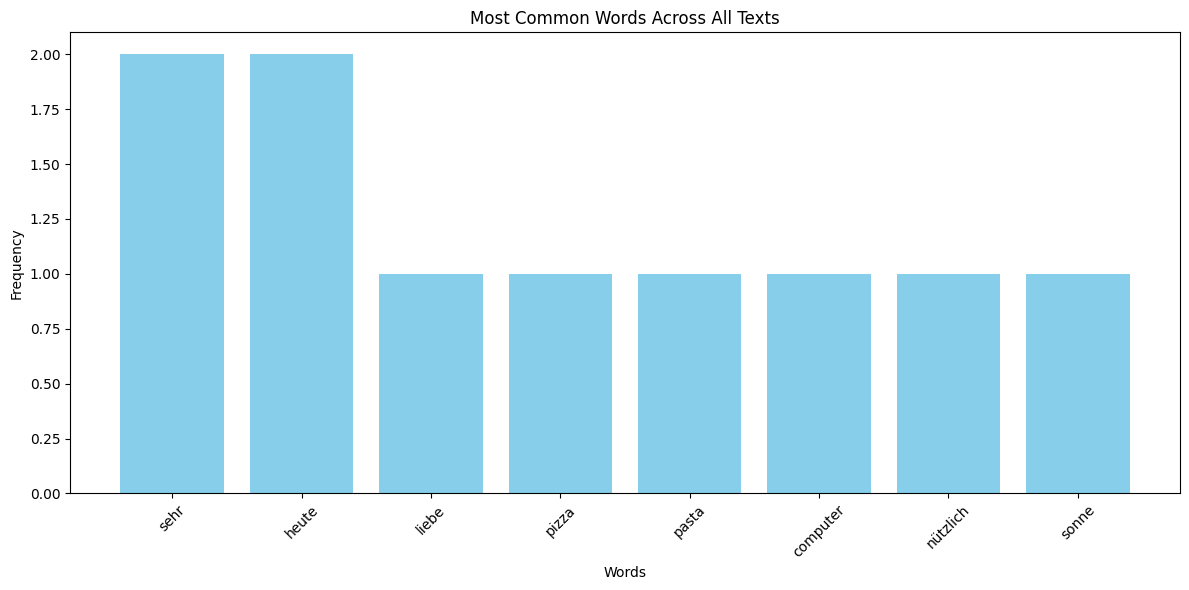

In [7]:
def analyze_multiple_texts(texts):
    """Analyze and compare multiple texts."""
    
    processor = GermanTextProcessor()
    results = []
    
    # Process each text
    for i, text in enumerate(texts):
        result = processor.process(text)
        result['text_id'] = i + 1
        results.append(result)
    
    # Create comparison summary
    summary = {
        'text_count': len(texts),
        'total_tokens': sum(r['token_count'] for r in results),
        'total_content_tokens': sum(r['content_token_count'] for r in results),
        'avg_tokens_per_text': sum(r['token_count'] for r in results) / len(results),
        'all_content_words': []
    }
    
    # Collect all content words
    for result in results:
        summary['all_content_words'].extend(result['content_tokens'])
    
    # Overall word frequency
    summary['overall_frequency'] = Counter(summary['all_content_words'])
    
    return results, summary

# Analyze all sample texts
analysis_results, summary = analyze_multiple_texts(german_texts)

print("=== MULTI-TEXT ANALYSIS RESULTS ===")
print(f"Total texts analyzed: {summary['text_count']}")
print(f"Total tokens: {summary['total_tokens']}")
print(f"Total content tokens: {summary['total_content_tokens']}")
print(f"Average tokens per text: {summary['avg_tokens_per_text']:.1f}")
print(f"\nMost common words across all texts:")
for word, count in summary['overall_frequency'].most_common(10):
    print(f"  {word}: {count}")

# Create visualization
top_words = summary['overall_frequency'].most_common(8)
if top_words:
    words, counts = zip(*top_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title('Most Common Words Across All Texts')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()